Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Saeed Damroodi"
COLLABORATORS = "Group14"

## Group Assignment - Data Science1


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for visualizing our data
import statsmodels.api as sm
%matplotlib inline
# import formula api as alias smf
import statsmodels.formula.api as smf
# This will ignore the warnings
import warnings
warnings.filterwarnings("ignore")


In [68]:
pj20 = pd.read_csv('shelter.csv',usecols =['OCCUPANCY_DATE','SECTOR','OCCUPANCY'])
pj19 = pd.read_csv('daily-shelter-occupancy-2019-csv.csv',usecols =['OCCUPANCY_DATE','SECTOR','OCCUPANCY'])
pj18 = pd.read_csv('daily-shelter-occupancy-2018-csv.csv',usecols =['OCCUPANCY_DATE','SECTOR','OCCUPANCY'])
pj17 = pd.read_csv('daily-shelter-occupancy-2017-csv.csv',usecols =['OCCUPANCY_DATE','SECTOR','OCCUPANCY'])

cov19 = pd.read_csv('COVID19 cases.csv',usecols =['Reported Date','Client Gender'])
#concatenated = pd.concat([df1, df2])
#cov19.head()

## Dataset Shelter 2017

In [4]:
pj17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38700 entries, 0 to 38699
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OCCUPANCY_DATE  38700 non-null  object
 1   SECTOR          38700 non-null  object
 2   OCCUPANCY       38700 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 907.2+ KB


In [5]:
pj17.describe().round(1)

,OCCUPANCY
count,38700.0
mean,46.2
std,52.7
min,0.0
25%,10.0
50%,30.0
75%,63.0
max,333.0


In [6]:
pj17.head()

,OCCUPANCY_DATE,SECTOR,OCCUPANCY
0,2017-01-01T00:00:00,Co-ed,16
1,2017-01-01T00:00:00,Men,13
2,2017-01-01T00:00:00,Men,63
3,2017-01-01T00:00:00,Families,66
4,2017-01-01T00:00:00,Men,58


In [7]:
pj17.isnull().sum()

OCCUPANCY_DATE    0
SECTOR            0
OCCUPANCY         0
dtype: int64

In [8]:
pj17.nunique()

OCCUPANCY_DATE    365
SECTOR              5
OCCUPANCY         306
dtype: int64

In [9]:
pj17['SECTOR'].unique()

array(['Co-ed', 'Men', 'Families', 'Women', 'Youth'], dtype=object)

In [10]:
pj17_g=pj17.groupby(['SECTOR'])['OCCUPANCY'].sum()
pj17_g

SECTOR
Co-ed       185997
Families    551861
Men         613698
Women       250765
Youth       183738
Name: OCCUPANCY, dtype: int64

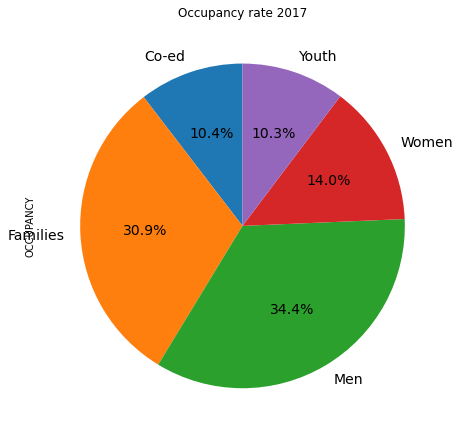

In [11]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
pj17_g.plot(kind='pie', ax=ax1, autopct='%1.1f%%',title='Occupancy rate 2017' , 
 startangle=90, shadow=False, legend = False, fontsize=14)

## Dataset Shelter 2018

In [12]:
pj18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37770 entries, 0 to 37769
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OCCUPANCY_DATE  37770 non-null  object
 1   SECTOR          37770 non-null  object
 2   OCCUPANCY       37770 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 885.4+ KB


In [13]:
pj18.describe().round(1)

,OCCUPANCY
count,37770.0
mean,61.5
std,88.8
min,0.0
25%,13.0
50%,38.0
75%,71.0
max,775.0


In [14]:
pj18.head()

,OCCUPANCY_DATE,SECTOR,OCCUPANCY
0,2018-01-01T00:00:00,Families,325
1,2018-01-01T00:00:00,Co-ed,16
2,2018-01-01T00:00:00,Families,319
3,2018-01-01T00:00:00,Co-ed,16
4,2018-01-01T00:00:00,Men,5


In [15]:
pj18['SECTOR'].unique()

array(['Families', 'Co-ed', 'Men', 'Women', 'Youth'], dtype=object)

In [16]:
pj18_g=pj18.groupby(['SECTOR'])['OCCUPANCY'].sum()
pj18_g

SECTOR
Co-ed       217494
Families    998622
Men         649625
Women       269750
Youth       187693
Name: OCCUPANCY, dtype: int64

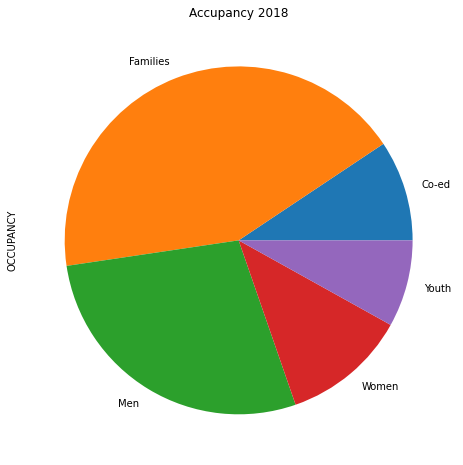

In [17]:
pj18_g.plot(kind='pie',stacked=False,figsize=(13,8),title= "Accupancy 2018");

## Dataset Shelter 2019

In [18]:
pj19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39446 entries, 0 to 39445
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OCCUPANCY_DATE  39446 non-null  object
 1   SECTOR          39446 non-null  object
 2   OCCUPANCY       39446 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 924.6+ KB


In [19]:
pj19.describe().round(1)

,OCCUPANCY
count,39446.0
mean,63.2
std,99.5
min,0.0
25%,16.0
50%,40.0
75%,71.0
max,826.0


In [20]:
pj19.head()

,OCCUPANCY_DATE,SECTOR,OCCUPANCY
0,2019-01-01T00:00:00,Families,543
1,2019-01-01T00:00:00,Co-ed,12
2,2019-01-01T00:00:00,Families,757
3,2019-01-01T00:00:00,Co-ed,16
4,2019-01-01T00:00:00,Men,81


In [21]:
pj19_g=pj19.groupby(['SECTOR'])['OCCUPANCY'].sum()
pj19_g

SECTOR
Co-ed        255805
Families    1090896
Men          649590
Women        306153
Youth        192072
Name: OCCUPANCY, dtype: int64

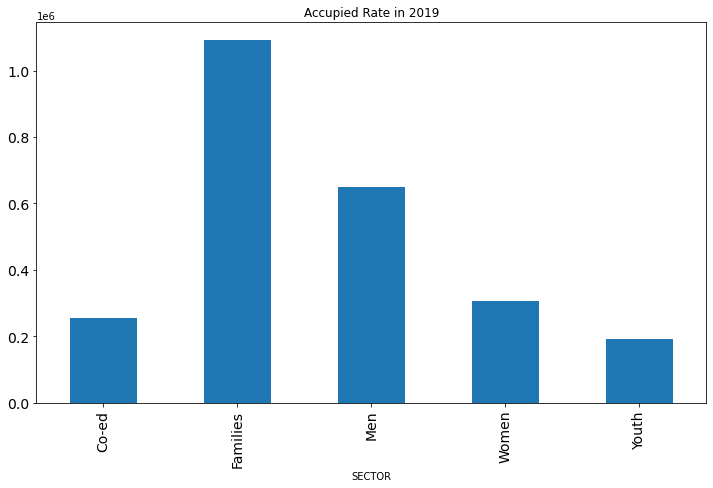

In [22]:
pj19_g.plot(kind='bar',stacked=False,figsize=(12,7),title = "Accupied Rate in 2019", fontsize=(14));


##  Shelter 2020 with Covid19

In [23]:
pj20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35762 entries, 0 to 35761
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OCCUPANCY_DATE  35762 non-null  object
 1   SECTOR          35762 non-null  object
 2   OCCUPANCY       35762 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 838.3+ KB


In [24]:
pj20.describe().round(1)

,OCCUPANCY
count,35762.0
mean,44.2
std,69.5
min,0.0
25%,10.0
50%,26.0
75%,52.0
max,778.0


In [25]:
pj20.head()

,OCCUPANCY_DATE,SECTOR,OCCUPANCY
0,2020-01-01T00:00:00,Women,0
1,2020-01-01T00:00:00,Families,545
2,2020-01-01T00:00:00,Families,778
3,2020-01-01T00:00:00,Co-ed,16
4,2020-01-01T00:00:00,Women,2


In [26]:
pj20_g=pj20.groupby(['SECTOR'])['OCCUPANCY'].sum()
pj20_g

SECTOR
Co-ed       218315
Families    633963
Men         423629
Women       182855
Youth       121165
Name: OCCUPANCY, dtype: int64

In [27]:
pj20['month_day']=pj20['OCCUPANCY_DATE'].str[0:10]

In [28]:
#pj20['month']=pj20['OCCUPANCY_DATE'].str[5:7]
#pj20_g=pj20.groupby(['month'])['OCCUPANCY'].sum()
#pj20_g

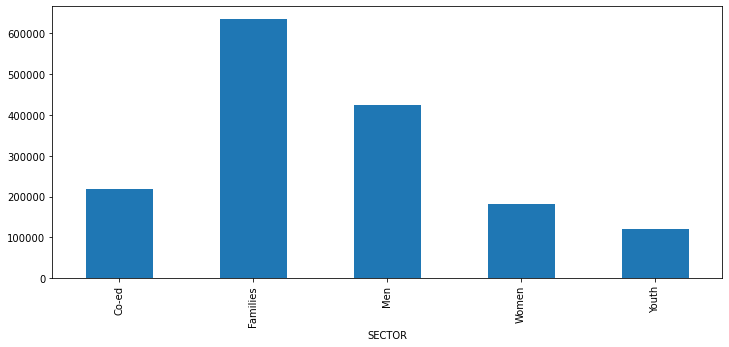

In [29]:
pj20_g.plot(kind='bar',stacked=False,figsize=(12,5));

# Normalisation base in years 2017,2018,2019,2020

In [30]:
pj20['typ']='P20'
pj19['typ']='P19'
pj18['typ']='P18'
pj17['typ']='P17'
frames = [pj17,pj18,pj19,pj20]
pjnr = pd.concat(frames)
pjnr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151678 entries, 0 to 35761
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   OCCUPANCY_DATE  151678 non-null  object
 1   SECTOR          151678 non-null  object
 2   OCCUPANCY       151678 non-null  int64 
 3   typ             151678 non-null  object
 4   month_day       35762 non-null   object
dtypes: int64(1), object(4)
memory usage: 6.9+ MB


In [31]:
pjnr.describe().round()

,OCCUPANCY
count,151678.0
mean,54.0
std,80.0
min,0.0
25%,12.0
50%,33.0
75%,64.0
max,826.0


In [32]:
pjnr.head()

,OCCUPANCY_DATE,SECTOR,OCCUPANCY,typ,month_day
0,2017-01-01T00:00:00,Co-ed,16,P17,NaN
1,2017-01-01T00:00:00,Men,13,P17,NaN
2,2017-01-01T00:00:00,Men,63,P17,NaN
3,2017-01-01T00:00:00,Families,66,P17,NaN
4,2017-01-01T00:00:00,Men,58,P17,NaN


In [33]:
pjnr_g=pjnr.groupby(['typ','SECTOR'])['OCCUPANCY'].sum()# Average of 3 last years
pjnr_g

typ  SECTOR  
P17  Co-ed        185997
     Families     551861
     Men          613698
     Women        250765
     Youth        183738
P18  Co-ed        217494
     Families     998622
     Men          649625
     Women        269750
     Youth        187693
P19  Co-ed        255805
     Families    1090896
     Men          649590
     Women        306153
     Youth        192072
P20  Co-ed        218315
     Families     633963
     Men          423629
     Women        182855
     Youth        121165
Name: OCCUPANCY, dtype: int64

In [34]:
pj17_g=pd.crosstab(pjnr['SECTOR'],pjnr['typ'],pjnr['OCCUPANCY'],aggfunc='sum')
pj17_g

typ,P17,P18,P19,P20
SECTOR,,,,
Co-ed,185997,217494,255805,218315
Families,551861,998622,1090896,633963
Men,613698,649625,649590,423629
Women,250765,269750,306153,182855
Youth,183738,187693,192072,121165


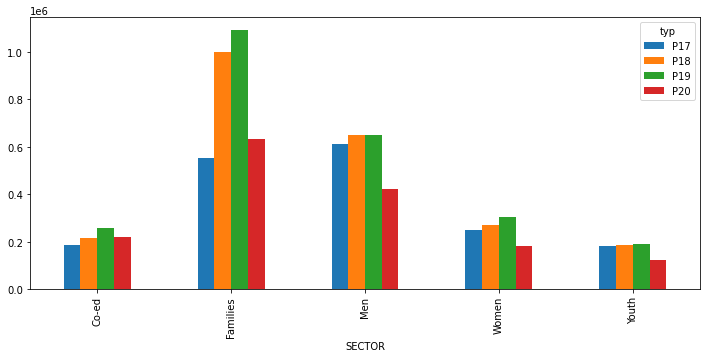

In [35]:
pj17_g.plot(kind='bar',stacked=False,figsize=(12,5));

## Covid19 in 2020

In [36]:
cov19['typ']='C'
cov19['Covid_cout']=1
cov19['month']=cov19['Reported Date'].str[5:7]
cov19['month_day']=cov19['Reported Date'].str[0:10]

In [37]:
cov19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32430 entries, 0 to 32429
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reported Date  32430 non-null  object
 1   Client Gender  32430 non-null  object
 2   typ            32430 non-null  object
 3   Covid_cout     32430 non-null  int64 
 4   month          32430 non-null  object
 5   month_day      32430 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


In [38]:
cov19.describe()

,Covid_cout
count,32430.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [39]:
cov19.head()

,Reported Date,Client Gender,typ,Covid_cout,month,month_day
0,2020-01-23,FEMALE,C,1,01,2020-01-23
1,2020-01-23,MALE,C,1,01,2020-01-23
2,2020-02-21,FEMALE,C,1,02,2020-02-21
3,2020-02-25,FEMALE,C,1,02,2020-02-25
4,2020-02-26,MALE,C,1,02,2020-02-26


In [40]:
cov19_g=cov19.groupby(['month'])['Covid_cout'].sum()
cov19_g

month
01       2
02       6
03     977
04    5605
05    5146
06    2630
07    1036
08     808
09    3898
10    9175
11    3147
Name: Covid_cout, dtype: int64

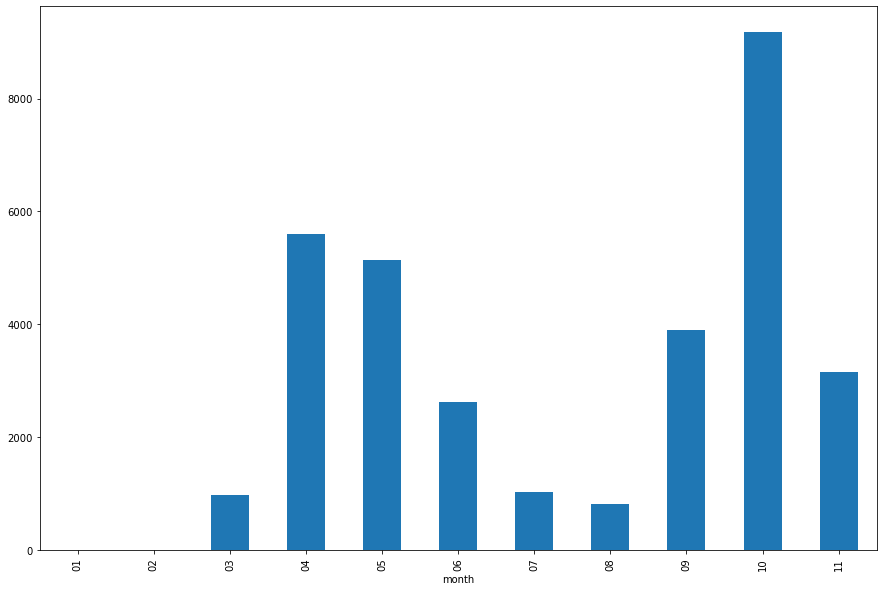

In [41]:
cov19_g.plot(kind='bar',stacked=False,figsize=(15,10));

# Merge Shelter 2020 & Covid19

In [ ]:
#pj20_g_d.head()

In [ ]:
#cov19.head()

In [42]:
pj20_g_d=pj20.groupby(['month_day'])['OCCUPANCY'].sum()

In [45]:
result = pd.merge(pj20_g_d, cov19, how='outer',on="month_day")
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32485 entries, 0 to 32484
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month_day      32485 non-null  object 
 1   OCCUPANCY      32485 non-null  int64  
 2   Reported Date  32430 non-null  object 
 3   Client Gender  32430 non-null  object 
 4   typ            32430 non-null  object 
 5   Covid_cout     32430 non-null  float64
 6   month          32430 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.0+ MB


In [46]:
result.describe()

,OCCUPANCY,Covid_cout
count,32485.000000,32430.0
mean,4376.843528,1.0
std,959.246323,0.0
min,3464.000000,1.0
25%,3553.000000,1.0
50%,3945.000000,1.0
75%,5070.000000,1.0
max,6796.000000,1.0


In [47]:
result.head()

,month_day,OCCUPANCY,Reported Date,Client Gender,typ,Covid_cout,month
0,2020-01-01,6789,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,6764,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,6741,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,6749,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,6729,NaN,NaN,NaN,NaN,NaN


In [48]:
#result = pd.merge(pj20_g_d, cov19, how='outer',on="month_day")
#result

In [49]:
result_new=result.drop(['Reported Date','Client Gender','typ','month'],axis=1)

In [50]:
result_new.head()

,month_day,OCCUPANCY,Covid_cout
0,2020-01-01,6789,NaN
1,2020-01-02,6764,NaN
2,2020-01-03,6741,NaN
3,2020-01-04,6749,NaN
4,2020-01-05,6729,NaN


In [51]:
result_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32485 entries, 0 to 32484
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month_day   32485 non-null  object 
 1   OCCUPANCY   32485 non-null  int64  
 2   Covid_cout  32430 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1015.2+ KB


In [52]:
result_new.isnull().sum()

month_day      0
OCCUPANCY      0
Covid_cout    55
dtype: int64

In [53]:
result_new.fillna(0,inplace=True)

In [69]:
result_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32485 entries, 0 to 32484
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month_day   32485 non-null  object 
 1   OCCUPANCY   32485 non-null  int64  
 2   Covid_cout  32485 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1015.2+ KB


In [70]:
result_new.isnull().sum()

month_day     0
OCCUPANCY     0
Covid_cout    0
dtype: int64

In [76]:
result_new.shape

(32485, 3)

In [1]:
Covid_cout

NameError: name 'Covid_cout' is not defined

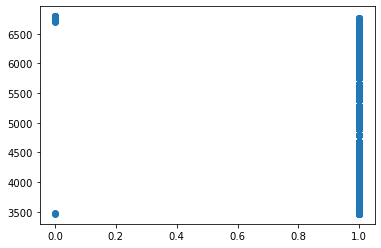

In [80]:
#plt.scatter(x= result_new['OCCUPANCY'],y= result_new['Covid_cout'])
plt.scatter(x= result_new['Covid_cout'],y= result_new['OCCUPANCY'])

In [74]:
#import statsmodels.api as sm

# import formula api as alias smf
#import statsmodels.formula.api as smf

x= result_new['Covid_cout']
y= result_new['OCCUPANCY']

x = sm.add_constant(x)
# Fit the OLS model
est = sm.OLS(y, x).fit()

# Check the results
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              OCCUPANCY   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     307.9
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.31e-68
Time:                        08:05:17   Log-Likelihood:            -2.6899e+05
No. Observations:               32485   AIC:                         5.380e+05
Df Residuals:                   32483   BIC:                         5.380e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6633.8182    128.738     51.530      0.000    6381.487    6886.150
Covid_cout -2260.8024    128.847    -17.546      0.000   -2513.348   -2008.257
==============================================================================
Omnibus:                     4083.021   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4890.188
Skew:                           0.912   Prob(JB):                         0.00
Kurtosis:                       2.468   Cond. No.                         48.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
est.params


const         6633.818182
Covid_cout   -2260.802394
dtype: float64

In [83]:
#results=ols('OCCUPANCY ~ Covid_cout',data=result_new).fit()
#print(results.summary())

In [85]:
#result_new.datetime=result_new.apply(pd.to_datetime)
#result_new['month']=result_new.datetime.apply(lambda x: x.month)
#result_new.head()